In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv("V:/bkp N/Advance Business Analytics/EptiopePrediction/input_bcell.csv")
df_2 = pd.read_csv("V:/bkp N/Advance Business Analytics/EptiopePrediction/input_sars.csv")
df_test = pd.read_csv("V:/bkp N/Advance Business Analytics/EptiopePrediction/input_covid.csv")

In [3]:
df_1.head()

parent_protein_id                                        protein_seq  \
0            A2T3T0  MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...   
1            F0V2I4  MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...   
2            O75508  MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...   
3            O84462  MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...   
4            P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...   

   start_position  end_position peptide_seq  chou_fasman  emini  \
0             161           165       SASFT        1.016  0.703   
1             251           255       LCLKI        0.770  0.179   
2             145           149       AHRET        0.852  3.427   
3             152           156       SNYDD        1.410  2.548   
4              85            89       DGTYR        1.214  1.908   

   kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                1.018    2.22           5.810364     0.103275   
1                1.199   -3.86           6.210876     0.065476   
2                0.960    4.28           8.223938     0.091787   
3                0.936    6.32           4.237976     0.044776   
4                0.937    4.64           6.867493     0.103846   

   hydrophobicity  stability  target  
0       -0.143829  40.273300       1  
1       -0.036905  24.998512       1  
2        0.879227  27.863333       1  
3       -0.521393  30.765373       1  
4       -0.578846  21.684615       1

In [4]:
df_2.head()

parent_protein_id                                        protein_seq  \
0          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
1          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
2          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
3          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
4          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   

   start_position  end_position        peptide_seq  chou_fasman  emini  \
0               1            17  MFIFLLFLTLTSGSDLD        0.887  0.040   
1               1            15    MFIFLLFLTLTSGSD        0.869  0.047   
2               2            10          FIFLLFLTL        0.621  0.042   
3               6            20    LFLTLTSGSDLDRCT        1.021  0.230   
4               9            25  TLTSGSDLDRCTTFDDV        1.089  0.627   

   kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                1.056  -2.159           5.569763     0.116335   
1                1.056  -2.500           5.569763     0.116335   
2                1.148  -7.467           5.569763     0.116335   
3                1.049   0.927           5.569763     0.116335   
4                1.015   3.165           5.569763     0.116335   

   hydrophobicity  stability  target  
0       -0.061116  33.205116       0  
1       -0.061116  33.205116       0  
2       -0.061116  33.205116       0  
3       -0.061116  33.205116       0  
4       -0.061116  33.205116       0

In [5]:
df_test.head()

parent_protein_id                                        protein_seq  \
0            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
1            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
2            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
3            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
4            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   

   start_position  end_position peptide_seq  chou_fasman  emini  \
0               1             5       MGILP        0.948  0.280   
1               2             6       GILPS        1.114  0.379   
2               3             7       ILPSP        1.106  0.592   
3               4             8       LPSPG        1.324  0.836   
4               5             9       PSPGM        1.326  1.004   

   kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                1.033   -2.72            6.03595      0.10929   
1                1.070   -0.58            6.03595      0.10929   
2                1.108   -1.30            6.03595      0.10929   
3                1.053    1.44            6.03595      0.10929   
4                0.968    2.44            6.03595      0.10929   

   hydrophobicity  stability  
0       -0.138642  31.377603  
1       -0.138642  31.377603  
2       -0.138642  31.377603  
3       -0.138642  31.377603  
4       -0.138642  31.377603

In [6]:
df_train = pd.concat([df_1,df_2])

In [7]:
df_train.head()

parent_protein_id                                        protein_seq  \
0            A2T3T0  MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...   
1            F0V2I4  MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...   
2            O75508  MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...   
3            O84462  MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...   
4            P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...   

   start_position  end_position peptide_seq  chou_fasman  emini  \
0             161           165       SASFT        1.016  0.703   
1             251           255       LCLKI        0.770  0.179   
2             145           149       AHRET        0.852  3.427   
3             152           156       SNYDD        1.410  2.548   
4              85            89       DGTYR        1.214  1.908   

   kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                1.018    2.22           5.810364     0.103275   
1                1.199   -3.86           6.210876     0.065476   
2                0.960    4.28           8.223938     0.091787   
3                0.936    6.32           4.237976     0.044776   
4                0.937    4.64           6.867493     0.103846   

   hydrophobicity  stability  target  
0       -0.143829  40.273300       1  
1       -0.036905  24.998512       1  
2        0.879227  27.863333       1  
3       -0.521393  30.765373       1  
4       -0.578846  21.684615       1

In [8]:
df_train.size

208698

In [9]:
df_train.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [10]:
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



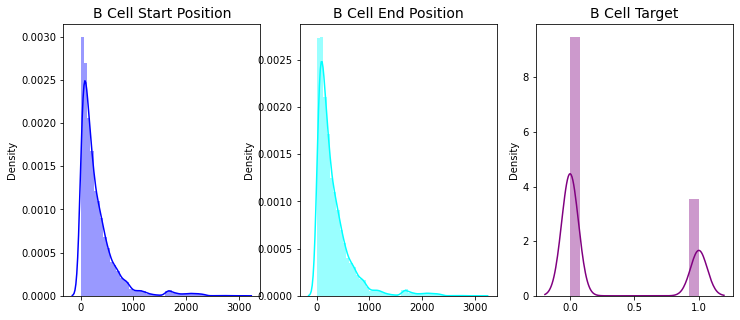

In [11]:
fig , ax = plt.subplots(1,3,figsize = (12,5))

start_position = df_train.start_position.values
end_position = df_train.end_position.values
target = df_train.target.values

sns.distplot(start_position , ax = ax[0] , color = 'blue').set_title('B Cell Start Position' , fontsize = 14)
sns.distplot(end_position , ax = ax[1] , color = 'cyan').set_title('B Cell End Position' , fontsize = 14)
sns.distplot(target , ax = ax[2] , color = 'purple').set_title('B Cell Target' , fontsize = 14)
plt.show()

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\niraj\Anaconda3\lib\site-pac

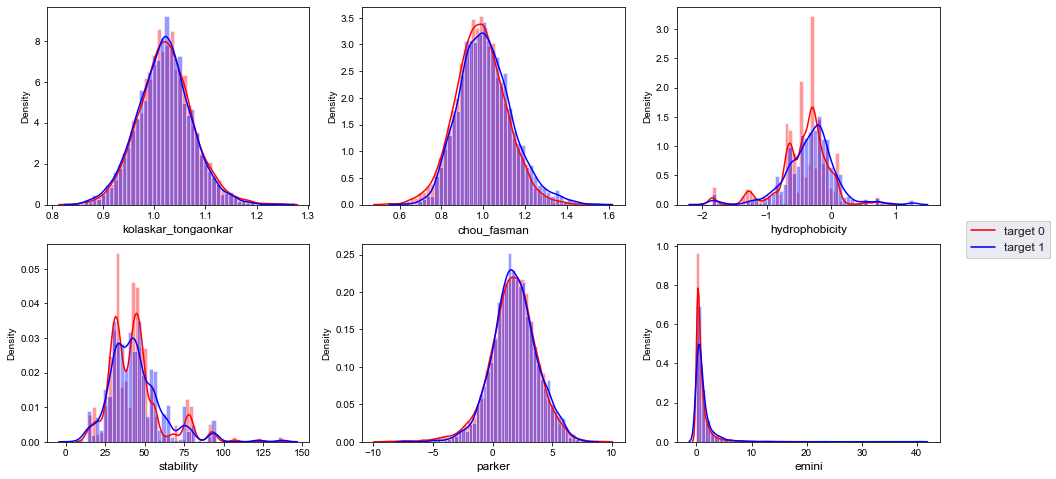

In [12]:
idx_train = df_train['target'].astype("bool").values
fig, axes = plt.subplots(2, 3,figsize=(16,8))
sns.set_style('darkgrid')
axes = [x for a in axes for x in a]
for i,name in enumerate(["kolaskar_tongaonkar", "chou_fasman", "hydrophobicity", "stability", "parker", "emini"]):
    value = df_train[name]
    sns.distplot(value[~idx_train],ax = axes[i], color='red')
    sns.distplot(value[idx_train],ax = axes[i], color = 'blue')
    axes[i].set_xlabel(name,fontsize=12)
    fig.legend(labels = ["target 0","target 1"],loc="right",fontsize=12)

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



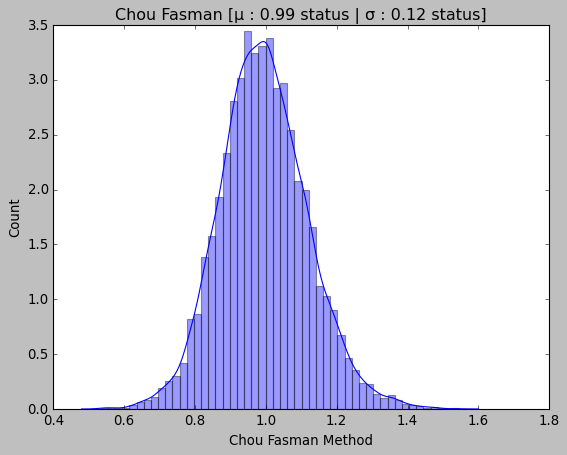

In [13]:
plt.style.use("classic")
sns.distplot(df_train['chou_fasman'], color='blue')
plt.title(f"Chou Fasman [\u03BC : {df_train['chou_fasman'].mean():.2f} status | \u03C3 : {df_train['chou_fasman'].std():.2f} status]")
plt.xlabel("Chou Fasman Method")
plt.ylabel("Count")
plt.show()

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



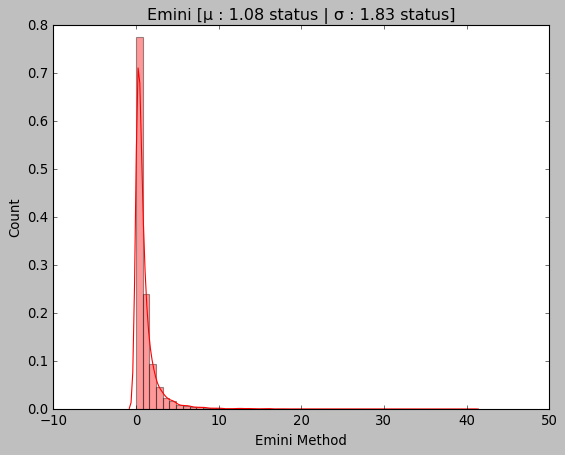

In [14]:
# Plot of Emini Method
plt.style.use("classic")
sns.distplot(df_train['emini'], color='red')
plt.title(f"Emini [\u03BC : {df_train['emini'].mean():.2f} status | \u03C3 : {df_train['emini'].std():.2f} status]")
plt.xlabel("Emini Method")
plt.ylabel("Count")
plt.show()

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



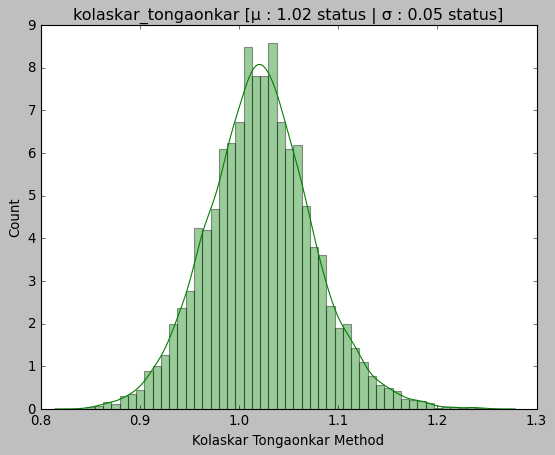

In [15]:
# Plot of Kolaskar Tongaonkar Method
plt.style.use("classic")
sns.distplot(df_train['kolaskar_tongaonkar'], color='green')
plt.title(f"kolaskar_tongaonkar [\u03BC : {df_train['kolaskar_tongaonkar'].mean():.2f} status | \u03C3 : {df_train['kolaskar_tongaonkar'].std():.2f} status]")
plt.xlabel("Kolaskar Tongaonkar Method")
plt.ylabel("Count")
plt.show()

C:\Users\niraj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



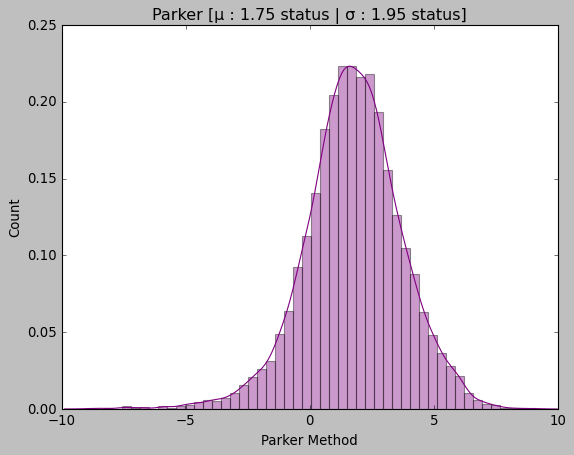

In [16]:
# Plot of Parker Method
plt.style.use("classic")
sns.distplot(df_train['parker'], color='purple')
plt.title(f"Parker [\u03BC : {df_train['parker'].mean():.2f} status | \u03C3 : {df_train['parker'].std():.2f} status]")
plt.xlabel("Parker Method")
plt.ylabel("Count")
plt.show()

In [17]:
df_train.head()

parent_protein_id                                        protein_seq  \
0            A2T3T0  MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...   
1            F0V2I4  MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...   
2            O75508  MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...   
3            O84462  MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...   
4            P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...   

   start_position  end_position peptide_seq  chou_fasman  emini  \
0             161           165       SASFT        1.016  0.703   
1             251           255       LCLKI        0.770  0.179   
2             145           149       AHRET        0.852  3.427   
3             152           156       SNYDD        1.410  2.548   
4              85            89       DGTYR        1.214  1.908   

   kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                1.018    2.22           5.810364     0.103275   
1                1.199   -3.86           6.210876     0.065476   
2                0.960    4.28           8.223938     0.091787   
3                0.936    6.32           4.237976     0.044776   
4                0.937    4.64           6.867493     0.103846   

   hydrophobicity  stability  target  
0       -0.143829  40.273300       1  
1       -0.036905  24.998512       1  
2        0.879227  27.863333       1  
3       -0.521393  30.765373       1  
4       -0.578846  21.684615       1

In [18]:
import matplotlib.style as style

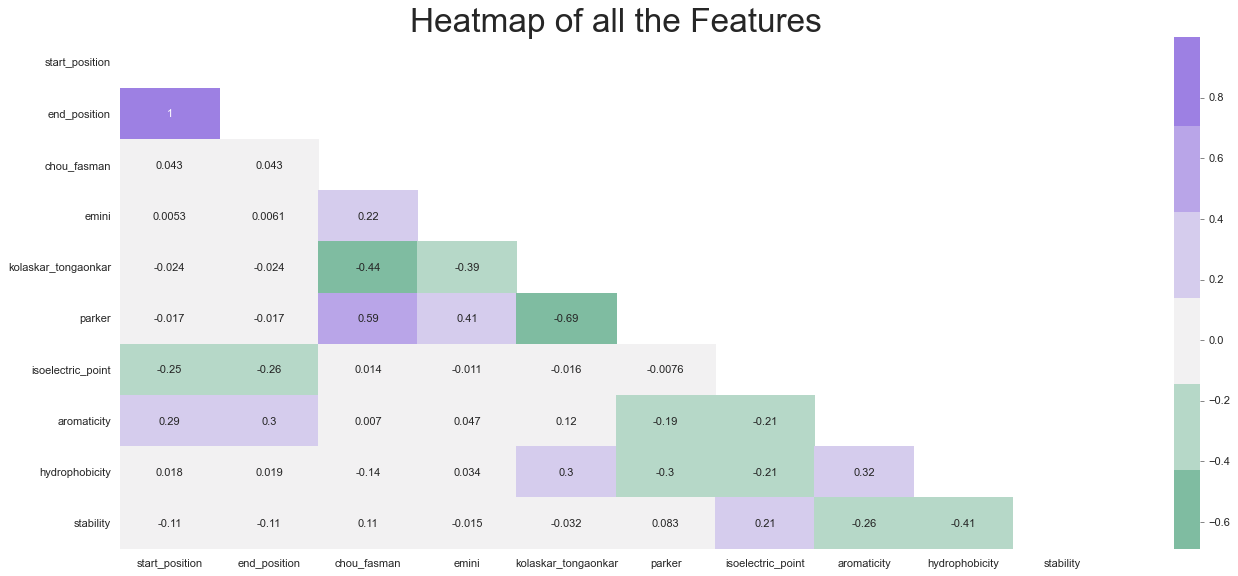

In [19]:
train_heat=df_train[df_train["target"].notnull()]
train_heat=train_heat.drop(["target"],axis=1)
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (20,8))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_heat.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train_heat.corr(), 
            cmap=sns.diverging_palette(150, 275, l=60, n=7), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

In [20]:
fig = px.bar(df_train, 
             x='chou_fasman', y='isoelectric_point', color_discrete_sequence=['red'],
             title='Chou and Fasman Scale & Isoelectric Point', text='peptide_seq')

fig.show()

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_train, test_size=0.1)

In [29]:
from pycaret.classification import *

In [30]:
experiment = setup(data = train,
                   target = 'target',
                   ignore_features = ['parent_protein_id', 'protein_seq', 'peptide_seq'],
                   normalize = True
                  )

In [31]:
compare_models()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=280, verbose=0,
                       warm_start=False)

In [32]:
from sklearn.metrics import roc_auc_score

best_models = ['et','catboost','xgboost','lightgbm','rf']

df_Results = pd.DataFrame(columns=['Classification', 'Dataset', 'Model', 'AUC'])

for m in best_models:
    
    print('-----------------------------------------------------')
    print('[START] - Processing model: ', m)
    print('-----------------------------------------------------')
    
    mo = create_model(m)
    
    print('-----------------------------------------------------')
    print('[START] - Tunning model: ', m)
    print('-----------------------------------------------------')
    
    tu = tune_model(mo)
    
    print('-----------------------------------------------------')
    print('[START] - Ensemble model: ', m)
    print('-----------------------------------------------------')
    
    en = ensemble_model(mo)
    
    mo_pred = predict_model(mo, test)
    mo_pred.dropna(inplace=True)
    
    tu_pred = predict_model(tu, test)
    tu_pred.dropna(inplace=True)
    
    en_pred = predict_model(en, test)
    en_pred.dropna(inplace=True)
    
    try:
        df_Results.loc[len(df_Results)] = [m, 'Valid', 'Model', roc_auc_score(mo_pred['target'], mo_pred['Label'])]
    except:
        df_Results.loc[len(df_Results)] = [m, 'Valid', 'Model', 'NA']
    try:
        df_Results.loc[len(df_Results)] = [m, 'Valid', 'Tunned', roc_auc_score(tu_pred['target'], tu_pred['Label'])]
    except:
        df_Results.loc[len(df_Results)] = [m, 'Valid', 'Tunned', 'NA']
    try:
        df_Results.loc[len(df_Results)] = [m, 'Valid', 'Ensembled', roc_auc_score(en_pred['target'], en_pred['Label'])]
    except:
        df_Results.loc[len(df_Results)] = [m, 'Valid', 'Ensembled', 'NA']
    
    print('-----------------------------------------------------')
    print('[FINISHED] - Model: ', m)
    print('-----------------------------------------------------')

-----------------------------------------------------
[FINISHED] - Model:  rf
-----------------------------------------------------


In [33]:
print(df_Results.sort_values(by=['Dataset', 'AUC'], ascending=False))

   Classification Dataset      Model       AUC
13             rf   Valid     Tunned  0.792636
0              et   Valid      Model  0.774647
7         xgboost   Valid     Tunned  0.767318
2              et   Valid  Ensembled  0.762413
12             rf   Valid      Model  0.762314
10       lightgbm   Valid     Tunned  0.748060
14             rf   Valid  Ensembled  0.745102
1              et   Valid     Tunned  0.742580
6         xgboost   Valid      Model  0.741715
3        catboost   Valid      Model  0.741393
4        catboost   Valid     Tunned  0.740088
9        lightgbm   Valid      Model  0.736219
5        catboost   Valid  Ensembled  0.732769
8         xgboost   Valid  Ensembled  0.732671
11       lightgbm   Valid  Ensembled  0.730490


In [34]:
rf = create_model('rf')

In [35]:
rf_tunned = tune_model(rf)

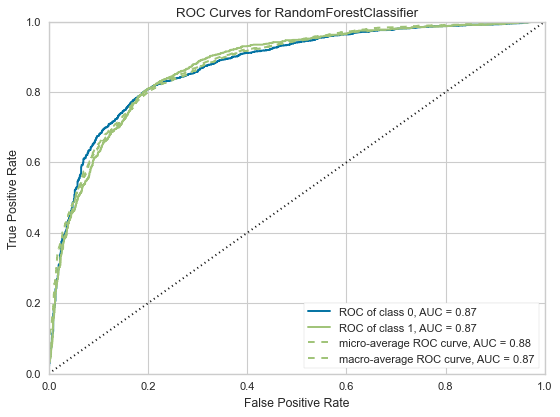

In [36]:
plot_model(rf_tunned)

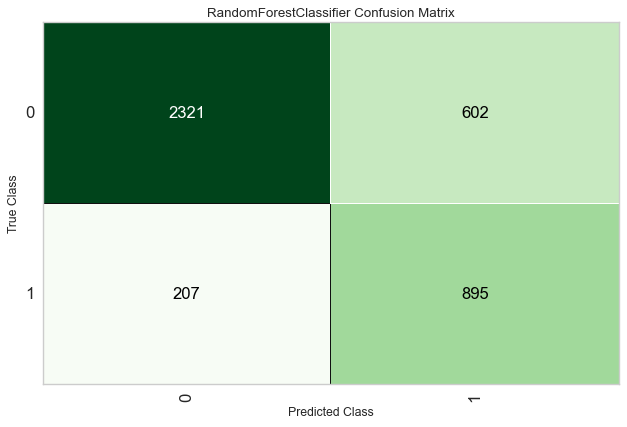

In [37]:
plot_model(rf_tunned, 'confusion_matrix')

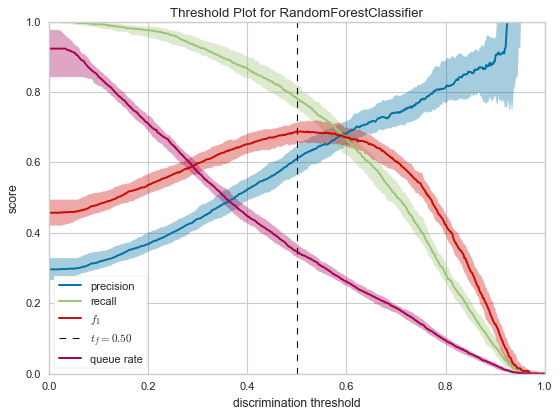

In [38]:
plot_model(rf_tunned, 'threshold')

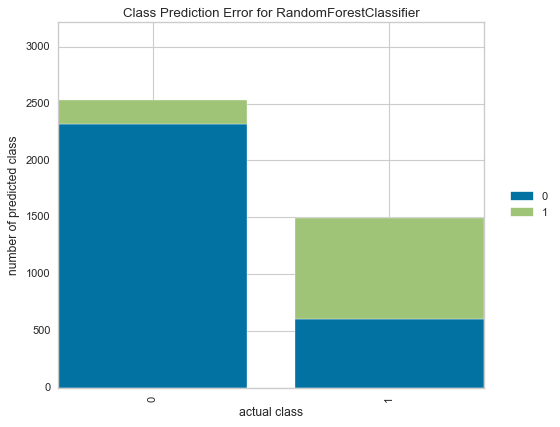

In [39]:
plot_model(rf_tunned, 'error')

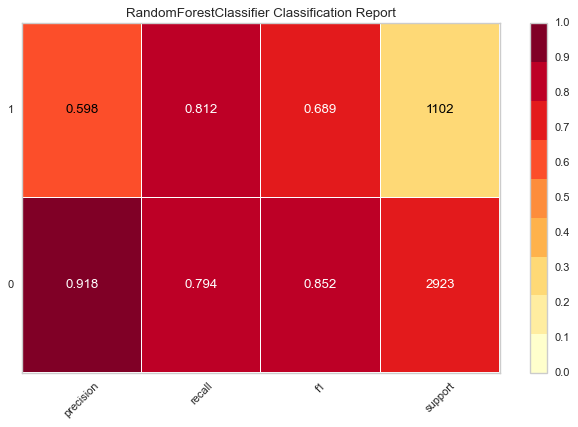

In [40]:
plot_model(rf_tunned, 'class_report')

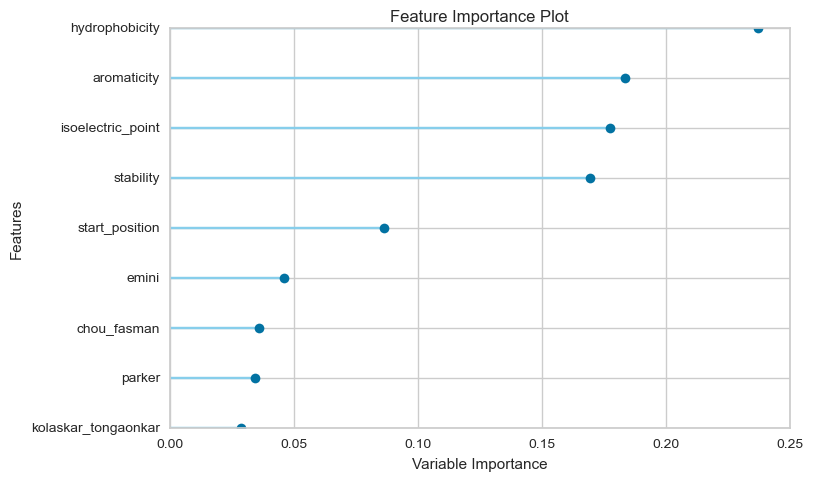

In [41]:
plot_model(rf_tunned, 'feature')

In [42]:
pred_covid = predict_model(rf_tunned, df_test)

In [45]:
df_test.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability'],
      dtype='object')

In [43]:
pred_covid

parent_protein_id                                        protein_seq  \
0                6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
1                6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
2                6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
3                6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
4                6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
...                 ...                                                ...   
20307            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
20308            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
20309            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
20310            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   
20311            6VYB_A  MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...   

       start_position  end_position           peptide_seq  chou_fasman  emini  \
0                   1             5                 MGILP        0.948  0.280   
1                   2             6                 GILPS        1.114  0.379   
2                   3             7                 ILPSP        1.106  0.592   
3                   4             8                 LPSPG        1.324  0.836   
4                   5             9                 PSPGM        1.326  1.004   
...               ...           ...                   ...          ...    ...   
20307            1258          1277  YVRKDGEWVLLSTFLGHHHH        0.947  0.406   
20308            1259          1278  VRKDGEWVLLSTFLGHHHHH        0.937  0.353   
20309            1260          1279  RKDGEWVLLSTFLGHHHHHH        0.960  0.647   
20310            1261          1280  KDGEWVLLSTFLGHHHHHHH        0.960  0.449   
20311            1262          1281  DGEWVLLSTFLGHHHHHHHH        0.957  0.306   

       kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                    1.033  -2.720            6.03595      0.10929   
1                    1.070  -0.580            6.03595      0.10929   
2                    1.108  -1.300            6.03595      0.10929   
3                    1.053   1.440            6.03595      0.10929   
4                    0.968   2.440            6.03595      0.10929   
...                    ...     ...                ...          ...   
20307                1.063   0.155            6.03595      0.10929   
20308                1.061   0.355            6.03595      0.10929   
20309                1.047   0.645            6.03595      0.10929   
20310                1.058   0.540            6.03595      0.10929   
20311                1.067   0.360            6.03595      0.10929   

       hydrophobicity  stability  Label   Score  
0           -0.138642  31.377603      1  0.5821  
1           -0.138642  31.377603      1  0.5847  
2           -0.138642  31.377603      1  0.6236  
3           -0.138642  31.377603      1  0.6349  
4           -0.138642  31.377603      1  0.5868  
...               ...        ...    ...     ...  
20307       -0.138642  31.377603      0  0.5085  
20308       -0.138642  31.377603      1  0.5664  
20309       -0.138642  31.377603      0  0.5357  
20310       -0.138642  31.377603      1  0.5038  
20311       -0.138642  31.377603      1  0.5443  

[20312 rows x 15 columns]

In [47]:
target_train = df_train['target']

In [49]:
dfTrain = df_train.drop('target', 1)

In [50]:
pred_covid = predict_model(rf_tunned, dfTrain)

In [51]:
pred_covid

parent_protein_id                                        protein_seq  \
0              A2T3T0  MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...   
1              F0V2I4  MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...   
2              O75508  MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...   
3              O84462  MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...   
4              P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...   
..                ...                                                ...   
515          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
516          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
517          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
518          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
519          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   

     start_position  end_position             peptide_seq  chou_fasman  emini  \
0               161           165                   SASFT        1.016  0.703   
1               251           255                   LCLKI        0.770  0.179   
2               145           149                   AHRET        0.852  3.427   
3               152           156                   SNYDD        1.410  2.548   
4                85            89                   DGTYR        1.214  1.908   
..              ...           ...                     ...          ...    ...   
515            1231          1245         SCGSCCKFDEDDSEP        1.227  0.503   
516            1234          1255  SCCKFDEDDSEPVLKGVKLHYT        1.047  0.606   
517            1236          1255    CKFDEDDSEPVLKGVKLHYT        1.021  1.361   
518            1236          1250         CKFDEDDSEPVLKGV        1.051  0.886   
519            1241          1255         DDSEPVLKGVKLHYT        1.028  1.675   

     kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                  1.018   2.220           5.810364     0.103275   
1                  1.199  -3.860           6.210876     0.065476   
2                  0.960   4.280           8.223938     0.091787   
3                  0.936   6.320           4.237976     0.044776   
4                  0.937   4.640           6.867493     0.103846   
..                   ...     ...                ...          ...   
515                1.035   4.907           5.569763     0.116335   
516                1.064   2.577           5.569763     0.116335   
517                1.049   2.440           5.569763     0.116335   
518                1.042   3.127           5.569763     0.116335   
519                1.056   2.207           5.569763     0.116335   

     hydrophobicity  stability  Label   Score  
0         -0.143829  40.273300      1  0.8184  
1         -0.036905  24.998512      1  0.7109  
2          0.879227  27.863333      1  0.7335  
3         -0.521393  30.765373      1  0.7912  
4         -0.578846  21.684615      1  0.8528  
..              ...        ...    ...     ...  
515       -0.061116  33.205116      0  0.5252  
516       -0.061116  33.205116      0  0.6501  
517       -0.061116  33.205116      0  0.6501  
518       -0.061116  33.205116      0  0.6231  
519       -0.061116  33.205116      0  0.6292  

[14907 rows x 15 columns]

In [52]:
pred_covid['target'] = target_train

In [54]:
pred_covid['Label'] = pred_covid['Label'].apply(pd.to_numeric)
pred_covid['comp'] = np.where(pred_covid['target'] == pred_covid['Label'], 'Correct', 'Incorrect')
pred_covid.groupby('comp').count()['Label']

comp
Correct      12280
Incorrect     2627
Name: Label, dtype: int64

In [56]:
y_sars_actu = pred_covid['target']
y_sars_pred = pred_covid['Label']

cm_sars = confusion_matrix(y_sars_actu, y_sars_pred)
cm_sars

array([[8873, 1992],
       [ 635, 3407]], dtype=int64)

<AxesSubplot:>

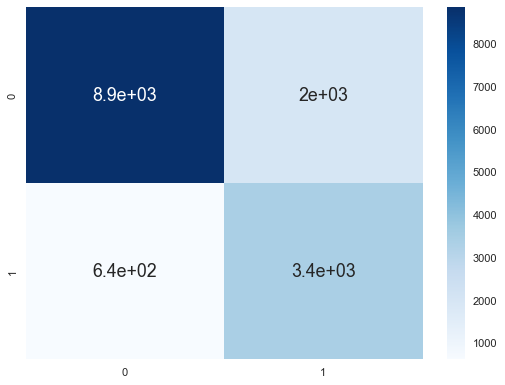

In [58]:
import seaborn as sn
sn.heatmap(cm_sars, cmap="Blues", annot=True,annot_kws={"size": 16})

In [60]:
from sklearn.metrics import accuracy_score
print('VALIDATION SARS ACCURACY', accuracy_score(y_sars_actu, y_sars_pred))

VALIDATION SARS ACCURACY 0.8237740658750923
